In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fa5eced9748>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fa5af7460f0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fa5af746208>)

In [6]:
mnist.train.images.shape,mnist.train.labels.shape # Not one hot coded now

((55000, 784), (55000, 10))

In [7]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape,mnist.validation.labels.shape

((5000, 784), (5000, 10))

## After doing one hot encoding

In [9]:
mnist.train.images.shape,mnist.train.labels.shape # Not one hot coded now

((55000, 784), (55000, 10))

In [10]:
mnist.test.images.shape,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [11]:
mnist.validation.images.shape,mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [12]:
mnist.train.labels[0] # It is a 7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [13]:
import numpy as np
import matplotlib.pyplot as plt

first_image=mnist.train.images[1]
first_image=np.array(first_image,dtype='float')
first_image=first_image.reshape((28,28)) # reshape in 28*28 pixels
plt.imshow(first_image)
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
r_arr=np.random.random((28,28))

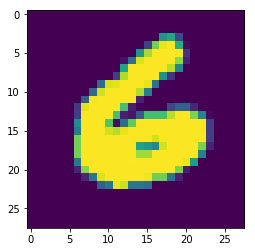

In [15]:
plt.imshow(mnist.train.images[18].reshape(28,28))

In [ ]:
from sklearn.datasets.base import get_data_home 
print (get_data_home())

In [ ]:
with tf.Session() as sess:
    #print(
        tf.random_normal([784,256]).eval()
    #)

## Architecture of our neural network

In [16]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10
# Each of the 784 features going into each unit of hidden layer 1 unit
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}
# The bias (1 additional feature) is going into each of the hidden layer 1 unit
biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

## Forward Propogation

In [17]:
def forward_propogation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1']) # This is the net input going into layer 1
    out_layer1=tf.nn.relu(in_layer1) # Applying this activation function
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    return output

# Finding predictions and accuracy with random weights

In [63]:
x = tf.placeholder("float",[None,n_input]) # None because we are not sure of how many data points and n_input because each data point has 784 features
y = tf.placeholder(tf.int32,[None,n_classes]) # None because we are not sure of how many data points we are passing and n_classes because we have to predict from 10 available classes
pred = forward_propogation(x,weights,biases) # X can be either training data or testing data

## Calculating cost using cross entropy

In [64]:
tf.trainable_variables()

[<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>]

In [65]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels = y))

In [66]:
# optimizer first decides on what variables does cost depend upon which is weights and biases which further depend upon h1,h2,out in both the layers
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [67]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # This will initialize all the tensorflow variable once again 

In [75]:
for i in range(25):
    # Every time the weights and biases are updated ,the complete data set is feeded (stochastic gradient descent)
    c,_ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
    print(c)

75.20092
72.18972
68.877075
65.6104
62.774292
60.571274
58.95807
57.799553
56.850155
55.862865
54.657494
53.20949
51.605156
50.007114
48.550556
47.278656
46.191906
45.20008
44.22488
43.221783
42.188843
41.171
40.18971
39.29714
38.520386


In [78]:
# Find the maximum in y for each data point , because that is the digit that I am going to predict
predictions = tf.arg_max(pred,1)
correct_labels = tf.arg_max(y,1)
correct_predictions = tf.equal(predictions,correct_labels)
predictions_evaluated,labels,correct_pred = sess.run([predictions,correct_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
# feed_dict only need x as predictions depend only upon x and not on any other parameter
predictions_evaluated,labels,correct_pred # False mean wrong and True means right
print("Accuracy is :" ,correct_pred.sum()/len(mnist.test.labels) * 100,"%")

Accuracy is : 95.64 %


In [ ]:
 for i in range(25):
    # Every time the weights and biases are updated ,the complete data set is feeded (stochastic gradient descent)
    c,_ = sess.run([cost,optimize], feed_dict={x:mnist.train.images , y:mnist.train.labels})
    print(c)

In [77]:
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost) # total cost seems to be higher at each point ,since we are summing multiple costs

11743.095062971115
3609.660050109029
2210.122366058547
1397.8416607348704
1100.600599762373
1032.816126814321
964.7961507570318
819.5742163836018
727.9790352943602
657.6668760176685
512.999181450055
509.7214386775686
419.78280051062984
474.79585947359914
329.726447637582
353.7880389226131
304.4687035769716
295.74674930718373
239.36496720287937
182.7181067114854
196.51661575811355
194.41506871553995
140.60204642375885
141.54089442385245
108.24533117159055
